In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [2]:
# Load breast cancer data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

In [3]:
# Create a DataFrame for better visualization
df = pd.DataFrame(data=X, columns=feature_names)
df['target'] = y

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:

# Display class distribution
print("Class Distribution:")
print(df['target'].value_counts())

Class Distribution:
target
1    357
0    212
Name: count, dtype: int64


In [5]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

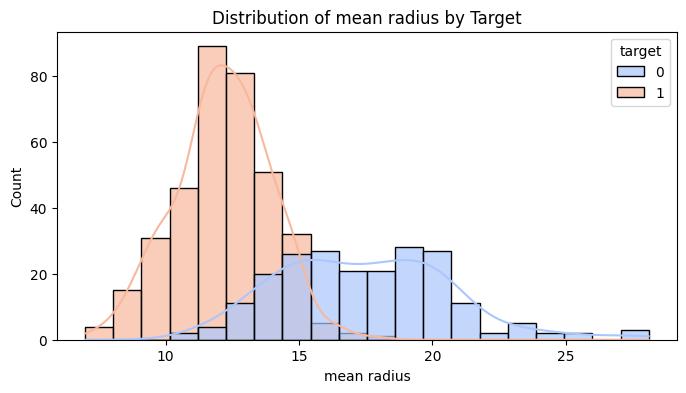

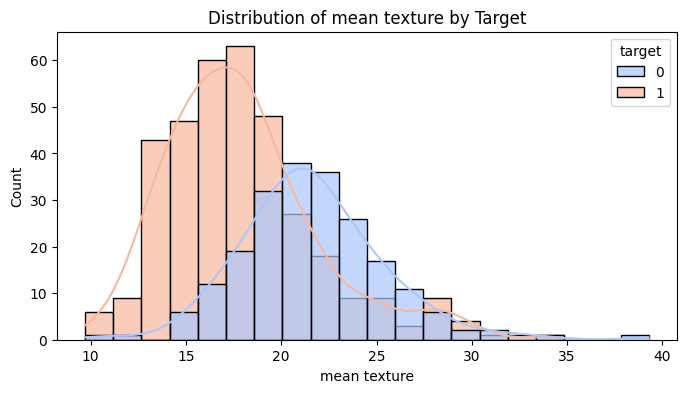

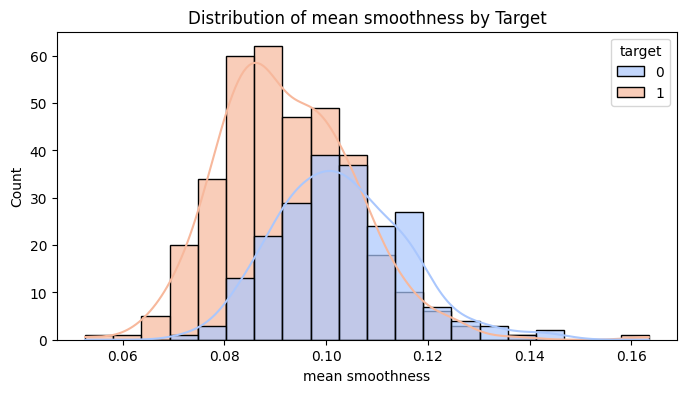

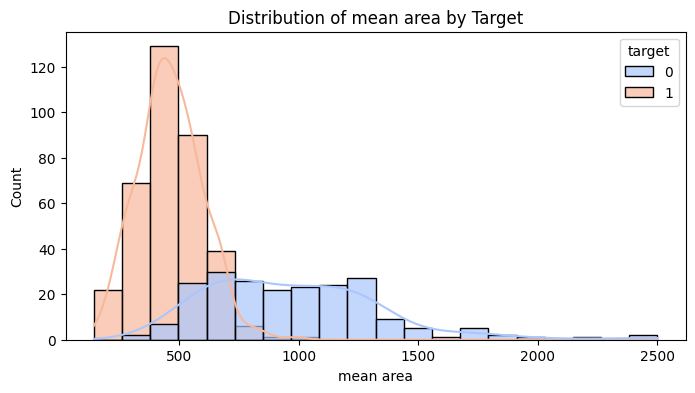

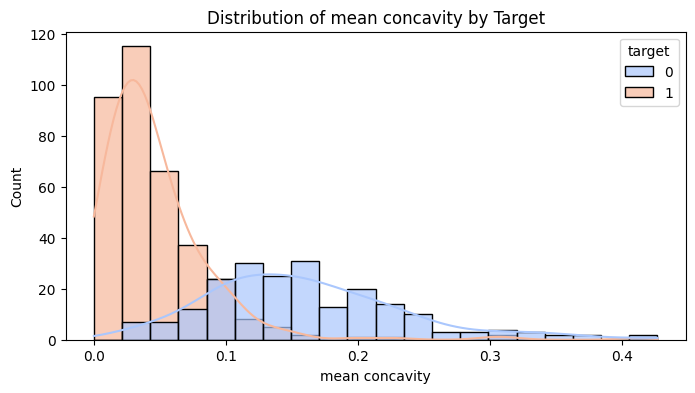

In [6]:
# EDA visualizations
selected_features = ['mean radius', 'mean texture', 'mean smoothness', 'mean area', 'mean concavity']

# Feature distribution plots with KDE
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, hue='target', kde=True, bins=20, palette='coolwarm', alpha=0.7)
    plt.title(f'Distribution of {feature} by Target')
    plt.show()

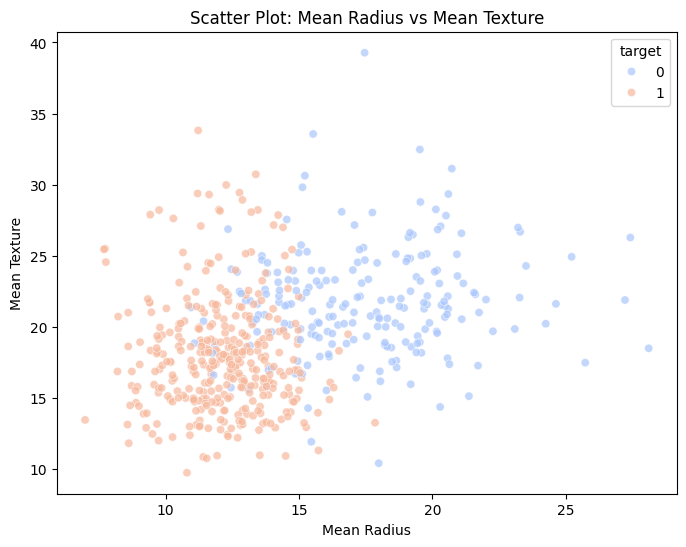

In [7]:
# Scatter plot for feature relationships
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='mean radius', y='mean texture', hue='target',
    data=df, palette='coolwarm', alpha=0.7, legend="full"
)
plt.title('Scatter Plot: Mean Radius vs Mean Texture')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.show()

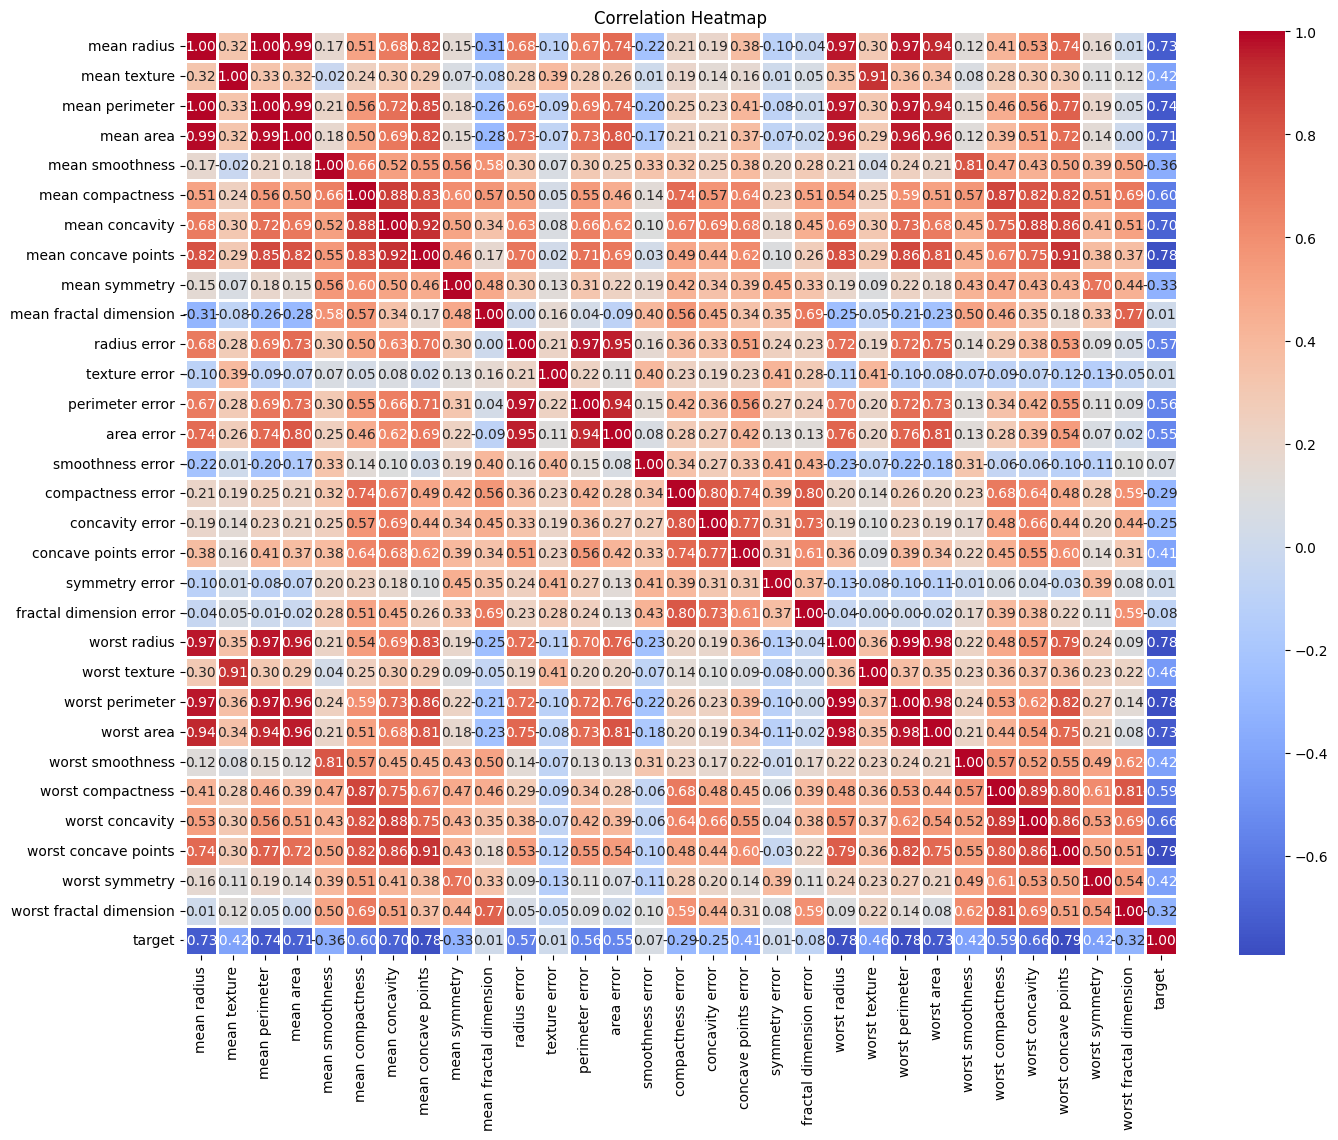

In [8]:
# Correlation heatmap
plt.figure(figsize=(16, 12))  # Adjusted size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8)
plt.title('Correlation Heatmap')
plt.show()

In [9]:

# Custom KNN Implementation
class KNN:
    def __init__(self, k=1):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))  # Fixed to Euclidean distance
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [10]:
# Train and evaluate custom KNN
knn_model = KNN(k=1)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

In [11]:

# Metrics for custom KNN
confusion_matrix_knn = confusion_matrix(y_test, knn_predictions)
accuracy_knn = accuracy_score(y_test, knn_predictions)
precision_knn = precision_score(y_test, knn_predictions)
recall_knn = recall_score(y_test, knn_predictions)
f1_knn = f1_score(y_test, knn_predictions)

print("Confusion Matrix (Custom KNN):")
print(confusion_matrix_knn)
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

Confusion Matrix (Custom KNN):
[[39  4]
 [ 3 68]]
Accuracy: 0.9385964912280702
Precision: 0.9444444444444444
Recall: 0.9577464788732394
F1 Score: 0.951048951048951


In [12]:
# Sklearn KNN with GridSearch
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Best Hyperparameters: {'n_neighbors': 7}
Best F1-Score: 0.969458580779401


In [13]:
# Evaluate the best sklearn KNN model
best_knn_model = grid_search.best_estimator_
sklearn_knn_predictions = best_knn_model.predict(X_test)

confusion_matrix_sklearn_knn = confusion_matrix(y_test, sklearn_knn_predictions)
accuracy_sklearn_knn = accuracy_score(y_test, sklearn_knn_predictions)
precision_sklearn_knn = precision_score(y_test, sklearn_knn_predictions)
recall_sklearn_knn = recall_score(y_test, sklearn_knn_predictions)
f1_sklearn_knn = f1_score(y_test, sklearn_knn_predictions)

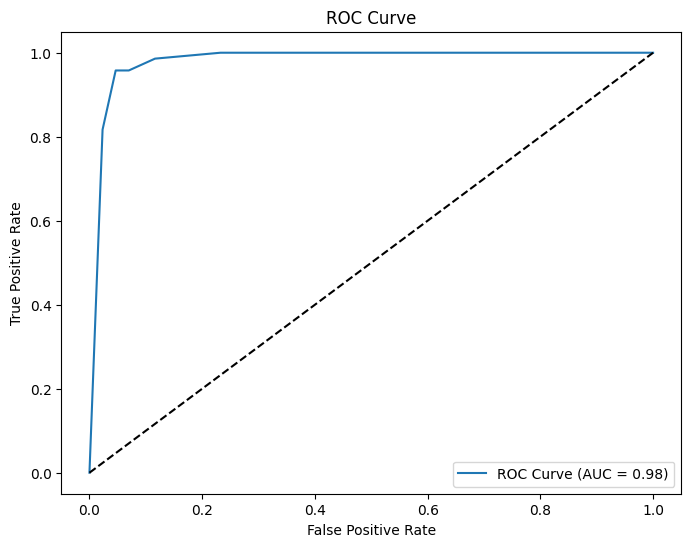

In [14]:
# ROC Curve
y_prob = best_knn_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [15]:
# Final Metrics for sklearn KNN
print("Confusion Matrix (Sklearn's KNN):")
print(confusion_matrix_sklearn_knn)
print("Accuracy:", accuracy_sklearn_knn)
print("Precision:", precision_sklearn_knn)
print("Recall:", recall_sklearn_knn)
print("F1 Score:", f1_sklearn_knn)

Confusion Matrix (Sklearn's KNN):
[[40  3]
 [ 3 68]]
Accuracy: 0.9473684210526315
Precision: 0.9577464788732394
Recall: 0.9577464788732394
F1 Score: 0.9577464788732394
